In [1]:
#Import libs and frameworks
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mp
import copy
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, BatchNormalization, Dropout
from keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from sklearn.model_selection import GridSearchCV

#Remove warning
import warnings
warnings.filterwarnings('ignore')

# Import dataset

In [2]:
'''
Bọn em đã chuyển đổi từ .xlsx sang .csv do pandas đọc csv nhanh hơn xlsv rất nhiều
'''
data9_df = pd.read_csv("/kaggle/input/dataset1-radar-csv/data_match9.csv")
data10_df = pd.read_csv("/kaggle/input/dataset1-radar-csv/data_match10.csv")

In [3]:
# Preview the data
data9_df

,id,name,lat,lon,value,datetime,B04B,B05B,B06B,B09B,...,I2B,I4B,IRB,VSB,WVB,CAPE,TCC,TCW,TCWV,IMERG
0,116673.0,TanTruong,19.370885,105.654165,2.4,2019-09-01 00:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,25.2500,1.000003,64.852661,64.672195,0.151356
1,116673.0,TanTruong,19.370885,105.654165,0.0,2019-09-01 07:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,178.1875,1.000002,69.277817,68.070160,3.767498
2,116673.0,TanTruong,19.370885,105.654165,0.0,2019-09-01 08:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,98.2500,0.999998,68.917984,67.623199,3.938313
3,116673.0,TanTruong,19.370885,105.654165,0.0,2019-09-01 09:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,100.6875,1.000001,69.386337,68.394302,6.779099
4,116673.0,TanTruong,19.370885,105.654165,0.0,2019-09-01 10:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,103.3750,1.000004,69.258972,68.883392,11.281171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94909,ARG051,Muong Lat,20.532130,104.497900,0.0,2019-09-30 19:00:00,0.000000,0.000000,0.000000,252.025131,...,287.246948,289.799957,289.844177,0.000000,241.488937,0.0000,0.032684,29.050735,29.043701,0.000000
94910,ARG051,Muong Lat,20.532130,104.497900,0.0,2019-09-30 20:00:00,0.000000,0.000000,0.000000,251.509811,...,287.541168,289.384125,289.816071,0.000000,240.855423,0.0000,0.059967,29.342560,29.332611,0.000000
94911,ARG051,Muong Lat,20.532130,104.497900,0.0,2019-09-30 21:00:00,0.000000,0.000000,0.000000,251.352982,...,287.265533,288.940186,289.785553,0.000000,240.755707,0.0000,0.061554,29.333771,29.324005,0.000000
94912,ARG051,Muong Lat,20.532130,104.497900,0.0,2019-09-30 22:00:00,0.000391,0.000000,0.000000,250.246902,...,287.045563,288.297974,289.394928,0.000326,240.185898,0.0000,0.072815,29.282516,29.276657,0.000000


In [4]:
# Loại bỏ NaN và nối 2 dataset làm 1
data9_df.dropna(inplace=True)
data9_df.reset_index(drop=True, inplace=True)

data10_df.dropna(inplace=True)
data10_df.reset_index(drop=True, inplace=True)
data_df = pd.concat([data9_df, data10_df])
# data_df.index = range(1,172541)
data_df.reset_index(drop=True, inplace=True)
print(data_df.index)

# Add datetime to data_df
data_df['datetime']=pd.to_datetime(data_df['datetime'])
data_df['day'] = data_df['datetime'].dt.day
data_df['month']= data_df['datetime'].dt.month
data_df['year']= data_df['datetime'].dt.year
data_df['hour']= data_df['datetime'].dt.hour

RangeIndex(start=0, stop=161936, step=1)


In [5]:
# Preview data_df
data_df

,id,name,lat,lon,value,datetime,B04B,B05B,B06B,B09B,...,WVB,CAPE,TCC,TCW,TCWV,IMERG,day,month,year,hour
0,116673.0,TanTruong,19.370885,105.654165,1.8,2019-09-02 00:00:00,0.329821,0.112489,0.140388,209.438599,...,208.627686,85.437500,0.999995,66.224197,64.789810,3.138512,2,9,2019,0
1,116673.0,TanTruong,19.370885,105.654165,0.0,2019-09-02 06:00:00,0.456792,0.236232,0.256110,216.826859,...,214.086929,162.062500,0.986037,59.914459,59.660736,0.010731,2,9,2019,6
2,116673.0,TanTruong,19.370885,105.654165,0.0,2019-09-02 07:00:00,0.224721,0.104665,0.082116,241.436462,...,232.445724,121.125000,0.944113,59.892532,59.595276,2.905275,2,9,2019,7
3,116673.0,TanTruong,19.370885,105.654165,0.0,2019-09-02 08:00:00,0.289399,0.190360,0.150457,240.614517,...,231.490646,316.693573,0.989312,61.431885,61.168030,0.200322,2,9,2019,8
4,116673.0,TanTruong,19.370885,105.654165,0.0,2019-09-02 09:00:00,0.340962,0.246714,0.200930,235.812988,...,227.855331,477.137512,0.989366,62.994766,62.623108,0.417813,2,9,2019,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161931,ARG051,Muong Lat,20.532130,104.497900,0.0,2019-10-30 19:00:00,0.000000,0.000000,0.000000,240.928909,...,232.205475,0.000000,1.000000,13.110395,13.105123,0.000000,30,10,2019,19
161932,ARG051,Muong Lat,20.532130,104.497900,0.0,2019-10-30 20:00:00,0.000000,0.000000,0.000000,236.396774,...,229.200882,0.000000,1.000000,12.757570,12.751515,0.000000,30,10,2019,20
161933,ARG051,Muong Lat,20.532130,104.497900,0.0,2019-10-30 21:00:00,0.000000,0.000000,0.000000,228.068314,...,223.207443,0.000000,1.000000,13.127382,13.119375,1.764320,30,10,2019,21
161934,ARG051,Muong Lat,20.532130,104.497900,0.0,2019-10-30 22:00:00,0.000000,0.000000,0.000000,235.448730,...,227.895142,0.000000,1.000000,13.871017,13.864963,0.000000,30,10,2019,22


In [6]:
# Selected columns
# typical_input_features = ['B09B', 'B10B', 'B11B', 'B12B', 'B14B', 'B16B', 'I2B', 'I4B', 
#                  'IRB', 'VSB', 'WVB', 'TCC', 'TCW', 'TCWV']
full_input_features =['B09B', 'B10B', 'B11B', 'B12B', 'B14B', 'B16B', 'I2B', 'I4B', 
                 'IRB', 'VSB', 'WVB', 'TCC', 'TCW', 'TCWV','day','month','year','hour']

# Train val test split

In [7]:
X_full = data_df[full_input_features].values
y = data_df['value'].values

In [8]:
X_train_full , X_test_full, y_train, y_test = train_test_split(X_full, y, test_size = 0.1, shuffle=True,random_state=42)
X_train_full , X_val_full, y_train, y_val = train_test_split(X_train_full, y_train, test_size = 0.22, shuffle=True,random_state=42)
# X_train_typical = copy.deepcopy(X_train_full[:,0:-4])
# X_val_typical = copy.deepcopy(X_val_full[:,0:-4])
# X_test_typical = copy.deepcopy(X_test_full[:,0:-4])

In [9]:
# Test shape
print(X_train_full.shape)
# print(X_val_typical.shape)
print(y_test.shape)

(113678, 18)
(16194,)


In [10]:
X_train_full

array([[ 247.9987793 ,  257.38955688,  276.9881897 , ...,    9.        ,
        2019.        ,    0.        ],
       [ 226.70910645,  231.11128235,  245.94526672, ...,    9.        ,
        2019.        ,   19.        ],
       [ 240.38768005,  247.79914856,  274.53997803, ...,   10.        ,
        2019.        ,   20.        ],
       ...,
       [ 250.07162476,  259.48550415,  285.38650513, ...,    9.        ,
        2019.        ,    0.        ],
       [ 256.32250977,  262.45080566,  279.21463013, ...,   10.        ,
        2019.        ,   16.        ],
       [ 252.24710083,  260.04034424,  289.03421021, ...,    9.        ,
        2019.        ,   14.        ]])

In [11]:
# Normalize the dataset
mns = MinMaxScaler()
# X_train_typical = mns.fit_transform(X_train_typical)
# X_val_typical = mns.fit_transform(X_val_typical)
# X_test_typical = mns.fit_transform(X_test_typical)
# Don't normalize the datetime
X_train_full[:,0:-4] = mns.fit_transform(X_train_full[:,0:-4])
X_val_full[:,0:-4] = mns.fit_transform(X_val_full[:,0:-4])
X_test_full[:,0:-4] = mns.fit_transform(X_test_full[:,0:-4])

In [12]:
X_train_full.shape

(113678, 18)

In [13]:
X_test_full

array([[9.40599164e-01, 9.65886698e-01, 9.63247899e-01, ...,
        9.00000000e+00, 2.01900000e+03, 1.20000000e+01],
       [9.43642297e-01, 9.77003187e-01, 9.55325007e-01, ...,
        9.00000000e+00, 2.01900000e+03, 9.00000000e+00],
       [9.35661678e-01, 9.67500415e-01, 9.67132469e-01, ...,
        9.00000000e+00, 2.01900000e+03, 0.00000000e+00],
       ...,
       [9.07421632e-01, 9.48826390e-01, 9.40676870e-01, ...,
        1.00000000e+01, 2.01900000e+03, 1.00000000e+01],
       [9.75901761e-01, 9.91150668e-01, 9.81783354e-01, ...,
        1.00000000e+01, 2.01900000e+03, 8.00000000e+00],
       [9.80063103e-01, 9.89435358e-01, 9.84802118e-01, ...,
        9.00000000e+00, 2.01900000e+03, 3.00000000e+00]])

# Chuẩn bị một số array và hàm để thống kê sau

In [14]:
all_RMSE_scores = {}
all_Pearsonr_scores = {}
all_MSE_scores = {}
all_R2_scores = {}

In [15]:
def get_scores(y_true,y_pred):
    pearsonr_score, p_value = pearsonr(y_true, y_pred)
    return [mean_squared_error(y_true, y_pred,squared=True), pearsonr_score, 
            mean_squared_error(y_true, y_pred,squared=False), r2_score(y_true,y_pred)]

In [16]:
def add_to_dict(name,scores, RMSE, Pearsonr, MSE, R2):
    RMSE[name] = scores[2]
    Pearsonr[name]=scores[1]
    MSE[name]=scores[0]
    R2[name]=scores[3]

# 1. Linear regression model

## 1.1. Normal data

In [17]:
# With datetime
lr_model = LinearRegression()
lr_model.fit(X_train_full, y_train)
lr_model_result = get_scores(y_test, lr_model.predict(X_test_full))
print(lr_model_result)


[5.66124867890055, 0.30469011294279863, 2.3793378656467747, 0.09183441625773925]


In [18]:
add_to_dict('lr_test',get_scores(y_test, lr_model.predict(X_test_full)),all_RMSE_scores,all_Pearsonr_scores,all_MSE_scores,all_R2_scores)
add_to_dict('lr_train',get_scores(y_train, lr_model.predict(X_train_full)),all_RMSE_scores,all_Pearsonr_scores,all_MSE_scores,all_R2_scores)

## 1.2. With PolynomialFeatures

In [19]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly_full = poly_features.fit_transform(X_train_full)
X_test_poly_full = poly_features.fit_transform(X_test_full)


In [20]:
lr_model = LinearRegression()
lr_model.fit(X_train_poly_full, y_train)
lr_model_result = get_scores(y_test, lr_model.predict(X_test_poly_full))
print(lr_model_result)

[5.503807534319477, 0.3423052110095021, 2.346019508512126, 0.11709079291301949]


In [21]:
add_to_dict('lr_poly_test',get_scores(y_test, lr_model.predict(X_test_poly_full)),all_RMSE_scores,all_Pearsonr_scores,all_MSE_scores,all_R2_scores)
add_to_dict('lr_poly_train',get_scores(y_train, lr_model.predict(X_train_poly_full)),all_RMSE_scores,all_Pearsonr_scores,all_MSE_scores,all_R2_scores)

# 2. GradientBoosting Regressor

## 2.1. Use random hyperparameter

In [22]:

gbr = GradientBoostingRegressor()
gbr.fit(X_train_full, y_train)
predicted_test = gbr.predict(X_test_full)
gbr_model_result = get_scores(y_test, predicted_test)
print(gbr_model_result)

[5.191029395081695, 0.40901423536554166, 2.278383065922343, 0.16726600292655736]


In [23]:
add_to_dict('gbr_random_test',get_scores(y_test, gbr.predict(X_test_full)),all_RMSE_scores,all_Pearsonr_scores,all_MSE_scores,all_R2_scores)
add_to_dict('gbr_random_train',get_scores(y_train, gbr.predict(X_train_full)),all_RMSE_scores,all_Pearsonr_scores,all_MSE_scores,all_R2_scores)

## 2.2 Choose the best parameter for GradientBoosting Regressor

In [24]:

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_leaf' : [1,3,5],
    'max_features' : ['sqrt', 'log2']
}

gbm = GradientBoostingRegressor()

grid_search = GridSearchCV(gbm, param_grid=param_grid, cv=5)
grid_search.fit(X_train_full, y_train)

# In ra tham số tối ưu
print("Best parameters: ", grid_search.best_params_)

# Dự đoán với mô hình đã tìm được
y_pred = grid_search.predict(X_test_full)

# In ra kết quả của mô hình
print(get_scores(y_test, y_pred))

Best parameters:  {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 150}
[4.716513765860203, 0.4934478464944214, 2.1717536153671304, 0.24338680027164994]


In [25]:
add_to_dict('gbr_optimize_test',get_scores(y_test, grid_search.predict(X_test_full)),all_RMSE_scores,all_Pearsonr_scores,all_MSE_scores,all_R2_scores)
add_to_dict('gbr_optimize_train',get_scores(y_train, grid_search.predict(X_train_full)),all_RMSE_scores,all_Pearsonr_scores,all_MSE_scores,all_R2_scores)

# 3. XGBoost

In [26]:
# Full data
reg = xgb.XGBRegressor(n_estimators=3000)
reg.fit(X_train_full, y_train,
        eval_set=[(X_train_full, y_train), (X_test_full, y_test)],
        early_stopping_rounds=50,
       verbose=True)

[0]	validation_0-rmse:2.16143	validation_1-rmse:2.38034
[1]	validation_0-rmse:2.08088	validation_1-rmse:2.30616
[2]	validation_0-rmse:2.02785	validation_1-rmse:2.25623
[3]	validation_0-rmse:1.99157	validation_1-rmse:2.23374
[4]	validation_0-rmse:1.96372	validation_1-rmse:2.21098
[5]	validation_0-rmse:1.93481	validation_1-rmse:2.19428
[6]	validation_0-rmse:1.91577	validation_1-rmse:2.18543
[7]	validation_0-rmse:1.89826	validation_1-rmse:2.17599
[8]	validation_0-rmse:1.88862	validation_1-rmse:2.17554
[9]	validation_0-rmse:1.87302	validation_1-rmse:2.17285
[10]	validation_0-rmse:1.86272	validation_1-rmse:2.17344
[11]	validation_0-rmse:1.85808	validation_1-rmse:2.17263
[12]	validation_0-rmse:1.84001	validation_1-rmse:2.17036
[13]	validation_0-rmse:1.83452	validation_1-rmse:2.16922
[14]	validation_0-rmse:1.82161	validation_1-rmse:2.16677
[15]	validation_0-rmse:1.81325	validation_1-rmse:2.16607
[16]	validation_0-rmse:1.80154	validation_1-rmse:2.16098
[17]	validation_0-rmse:1.78327	validation

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=3000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [27]:
y_pred = reg.predict(X_test_full)
print(get_scores(y_test, y_pred))

[4.643233649014941, 0.5069709910639246, 2.1548163840603545, 0.2551422422008328]


In [28]:
add_to_dict('xgb_test',get_scores(y_test, reg.predict(X_test_full)),all_RMSE_scores,all_Pearsonr_scores,all_MSE_scores,all_R2_scores)
add_to_dict('xgb_train',get_scores(y_train, reg.predict(X_train_full)),all_RMSE_scores,all_Pearsonr_scores,all_MSE_scores,all_R2_scores)

# 4. SVR

In [29]:
regr = SVR(C=1.0, epsilon=0.2,verbose=True)
regr.fit(X_train_full,y_train)

[LibSVM].......
*
optimization finished, #iter = 7543
obj = -36344.980553, rho = -0.200142
nSV = 13920, nBSV = 13920


SVR(epsilon=0.2, verbose=True)

In [30]:
y_pred = regr.predict(X_test_full)
print(get_scores(y_test, y_pred))

[6.260695900051538, 0.11134642590886537, 2.5021382655743745, -0.004327643810074111]


In [31]:
add_to_dict('svr_test',get_scores(y_test, regr.predict(X_test_full)),all_RMSE_scores,all_Pearsonr_scores,all_MSE_scores,all_R2_scores)
add_to_dict('svr_train',get_scores(y_train, regr.predict(X_train_full)),all_RMSE_scores,all_Pearsonr_scores,all_MSE_scores,all_R2_scores)

# 5. MLP Regressor

## 5.1. MLP đơn giản

In [32]:
# Typical data
MLP_regr = MLPRegressor(hidden_layer_sizes=(16,8,4),batch_size = 32, verbose=True).fit(X_train_full,y_train)

Iteration 1, loss = 9.84961879
Iteration 2, loss = 2.63970724
Iteration 3, loss = 2.63657584
Iteration 4, loss = 2.63658226
Iteration 5, loss = 2.63658340
Iteration 6, loss = 2.63654347
Iteration 7, loss = 2.63644396
Iteration 8, loss = 2.63660236
Iteration 9, loss = 2.63757832
Iteration 10, loss = 2.63654586
Iteration 11, loss = 2.63654931
Iteration 12, loss = 2.63655729
Iteration 13, loss = 2.63660587
Iteration 14, loss = 2.63655172
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [33]:
y_pred = MLP_regr.predict(X_test_full)
print(get_scores(y_test, y_pred))

[6.233745469147811, nan, 2.496746977398353, -4.312474178425063e-06]


In [34]:
add_to_dict('MLP_simple_test',get_scores(y_test, MLP_regr.predict(X_test_full)),all_RMSE_scores,all_Pearsonr_scores,all_MSE_scores,all_R2_scores)
add_to_dict('MLP_simple_train',get_scores(y_train, MLP_regr.predict(X_train_full)),all_RMSE_scores,all_Pearsonr_scores,all_MSE_scores,all_R2_scores)

## 5.2. MLP nhiều lớp

In [35]:
MLP_regr = MLPRegressor(hidden_layer_sizes=(128,256,256, 128, 128, 64,64, 32,32, 16,16,16,8,8),batch_size = 32, verbose=True).fit(X_train_full,y_train)

Iteration 1, loss = 2.66074957
Iteration 2, loss = 2.63827055
Iteration 3, loss = 2.63757477
Iteration 4, loss = 2.63737140
Iteration 5, loss = 2.63742745
Iteration 6, loss = 2.63745085
Iteration 7, loss = 2.63716198
Iteration 8, loss = 2.63682261
Iteration 9, loss = 2.63683825
Iteration 10, loss = 2.63692140
Iteration 11, loss = 2.63685097
Iteration 12, loss = 2.63674604
Iteration 13, loss = 2.63693983
Iteration 14, loss = 2.63683460
Iteration 15, loss = 2.63682032
Iteration 16, loss = 2.63664982
Iteration 17, loss = 2.63683407
Iteration 18, loss = 2.63679929
Iteration 19, loss = 2.63676943
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [36]:
y_pred = MLP_regr.predict(X_test_full)
print(get_scores(y_test, y_pred))

[6.233741789034875, nan, 2.4967462404166896, -3.722118215865322e-06]


In [37]:
add_to_dict('MLP_complex_test',get_scores(y_test, MLP_regr.predict(X_test_full)),all_RMSE_scores,all_Pearsonr_scores,all_MSE_scores,all_R2_scores)
add_to_dict('MLP_complex_train',get_scores(y_train, MLP_regr.predict(X_train_full)),all_RMSE_scores,all_Pearsonr_scores,all_MSE_scores,all_R2_scores)

# 6. DecisionTreeRegressor

Tìm decision tree với R2 cao nhất

In [38]:
# Typical data
max_depth= -1
highest_score =-100
for i in range(2,44):
    DTRegr =DecisionTreeRegressor(max_depth=i)
    DTRegr.fit(X_train_full,y_train)
    y_train_pred_DTREG = DTRegr.predict(X_train_full)
    y_test_pred_DTREG = DTRegr.predict(X_test_full)
    if(DTRegr.score(X_test_full,y_test)>highest_score):
        max_depth=i
        highest_score = DTRegr.score(X_test_full,y_test)

In [39]:
DTRegr =DecisionTreeRegressor(max_depth=max_depth)
DTRegr.fit(X_train_full,y_train)

DecisionTreeRegressor(max_depth=7)

In [40]:
y_pred = DTRegr.predict(X_test_full)
print(get_scores(y_test, y_pred))

[5.264549769833013, 0.4013315088608382, 2.294460670796737, 0.15547201933035393]


In [41]:
add_to_dict('DecisionTree_test',get_scores(y_test, DTRegr.predict(X_test_full)),all_RMSE_scores,all_Pearsonr_scores,all_MSE_scores,all_R2_scores)
add_to_dict('DecisionTree_train',get_scores(y_train, DTRegr.predict(X_train_full)),all_RMSE_scores,all_Pearsonr_scores,all_MSE_scores,all_R2_scores)

### Current result

In [42]:
# Print all
print(all_RMSE_scores)
print(all_MSE_scores)
print(all_Pearsonr_scores)
print(all_R2_scores)

{'lr_test': 2.3793378656467747, 'lr_train': 2.1726566992606924, 'lr_poly_test': 2.346019508512126, 'lr_poly_train': 2.1252526236123175, 'gbr_random_test': 2.278383065922343, 'gbr_random_train': 1.9848936859546928, 'gbr_optimize_test': 2.1717536153671304, 'gbr_optimize_train': 1.6064425486728664, 'xgb_test': 2.1548163840603545, 'xgb_train': 1.5604588573803828, 'svr_test': 2.5021382655743745, 'svr_train': 2.3013073398123516, 'MLP_simple_test': 2.496746977398353, 'MLP_simple_train': 2.2962788331066117, 'MLP_complex_test': 2.4967462404166896, 'MLP_complex_train': 2.296279959245936, 'DecisionTree_test': 2.294460670796737, 'DecisionTree_train': 1.9349831062722629}
{'lr_test': 5.66124867890055, 'lr_train': 4.720437132842367, 'lr_poly_test': 5.503807534319477, 'lr_poly_train': 4.516698714171039, 'gbr_random_test': 5.191029395081695, 'gbr_random_train': 3.9398029445428064, 'gbr_optimize_test': 4.716513765860203, 'gbr_optimize_train': 2.5806576621865744, 'xgb_test': 4.643233649014941, 'xgb_train

# 7. LSTM

## 7.1. LSTM thường

In [43]:
# Typical data
# Khởi tạo mô hình
model = Sequential()

# Thêm lớp LSTM với 32 units
model.add(LSTM(16, activation='relu', input_shape=(1,18), return_sequences=True))
model.add(LSTM(16, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(LSTM(8, activation='relu'))
# Thêm lớp dense với 1 unit để dự đoán đầu ra
model.add(Dense(1))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 16)             2240      
                                                                 
 lstm_1 (LSTM)               (None, 1, 16)             2112      
                                                                 
 dropout (Dropout)           (None, 1, 16)             0         
                                                                 
 batch_normalization (BatchN  (None, 1, 16)            64        
 ormalization)                                                   
                                                                 
 lstm_2 (LSTM)               (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                        

In [44]:
# Compile model
model.compile(optimizer=Adam(learning_rate = 0.001), loss='mse')

In [45]:
# Reshape
X_train_reshape = X_train_full.reshape((X_train_full.shape[0],1,X_train_full.shape[1]))
X_val_reshape = X_val_full.reshape((X_val_full.shape[0],1,X_val_full.shape[1]))
X_test_reshape = X_test_full.reshape((X_test_full.shape[0],1,X_test_full.shape[1]))
print(X_val_reshape.shape)

(32064, 1, 18)


In [46]:
y_val

array([0. , 0. , 0.6, ..., 0. , 0. , 0. ])

In [47]:
# Fit mô hình với dữ liệu huấn luyện
model.fit(X_train_reshape, y_train, epochs=100, batch_size=32, validation_data = (X_val_reshape, y_val))

Epoch 1/100
3553/3553 [==============================] - 23s 5ms/step - loss: 5.2324 - val_loss: 6.6705
Epoch 2/100
3553/3553 [==============================] - 18s 5ms/step - loss: 5.1061 - val_loss: 6.4528
Epoch 3/100
3553/3553 [==============================] - 18s 5ms/step - loss: 5.0764 - val_loss: 6.1944
Epoch 4/100
3553/3553 [==============================] - 19s 5ms/step - loss: 5.0630 - val_loss: 6.2656
Epoch 5/100
3553/3553 [==============================] - 19s 5ms/step - loss: 5.0772 - val_loss: 6.4384
Epoch 6/100
3553/3553 [==============================] - 19s 5ms/step - loss: 5.0429 - val_loss: 6.1270
Epoch 7/100
3553/3553 [==============================] - 19s 5ms/step - loss: 5.0269 - val_loss: 6.3168
Epoch 8/100
3553/3553 [==============================] - 18s 5ms/step - loss: 5.0241 - val_loss: 9.0098
Epoch 9/100
3553/3553 [==============================] - 18s 5ms/step - loss: 5.0146 - val_loss: 8.9114
Epoch 10/100
3553/3553 [==============================] - 19s 5m

In [48]:
y_pred_LSTM = model.predict(X_test_reshape)
y_pred_LSTM.flatten()


507/507 [==============================] - 2s 2ms/step


array([0.34101602, 0.34101602, 0.34101602, ..., 0.34101602, 0.34101602,
       0.34101602], dtype=float32)

In [49]:
add_to_dict('LSTM_normal_train',get_scores(y_train, model.predict(X_train_reshape).flatten()),all_RMSE_scores,all_Pearsonr_scores,all_MSE_scores,all_R2_scores)
add_to_dict('LSTM_normal_val',get_scores(y_val, model.predict(X_val_reshape).flatten()),all_RMSE_scores,all_Pearsonr_scores,all_MSE_scores,all_R2_scores)
add_to_dict('LSTM_normal_test',get_scores(y_test, model.predict(X_test_reshape).flatten()),all_RMSE_scores,all_Pearsonr_scores,all_MSE_scores,all_R2_scores)

507/507 [==============================] - 1s 2ms/step


## 7.2. LSTM với time series

### Process the data

In [50]:
X_full = data_df[full_input_features].values
y = data_df['value'].values


In [51]:
X_full

array([[ 209.43859863,  209.35040283,  209.15534973, ...,    9.        ,
        2019.        ,    0.        ],
       [ 216.82685852,  219.20097351,  227.15180969, ...,    9.        ,
        2019.        ,    6.        ],
       [ 241.4364624 ,  249.24224854,  275.17404175, ...,    9.        ,
        2019.        ,    7.        ],
       ...,
       [ 228.0683136 ,  232.74804688,  244.76976013, ...,   10.        ,
        2019.        ,   21.        ],
       [ 235.44873047,  241.35107422,  256.68945312, ...,   10.        ,
        2019.        ,   22.        ],
       [ 235.67256165,  241.28044128,  256.39883423, ...,   10.        ,
        2019.        ,   23.        ]])

In [52]:
X_train_TS , X_test_TS, y_train_TS, y_test_TS = train_test_split(X_full, y, test_size = 0.1, shuffle=False,random_state=42)
X_train_TS , X_val_TS, y_train_TS, y_val_TS = train_test_split(X_train_TS, y_train_TS, test_size = 0.22, shuffle=False,random_state=42)


In [53]:
# Làm nó chia được cho 3
X_train_TS = X_train_TS[0:-2]
X_train_TS.shape

(113676, 18)

In [54]:
print(X_val_TS.shape)
print(X_test_TS.shape)

(32064, 18)
(16194, 18)


In [55]:
X_train_TS = X_train_TS.reshape((-1,3,18))
X_val_TS = X_val_TS.reshape((-1,3,18))
X_test_TS = X_test_TS.reshape((-1,3,18))
X_train_TS.shape

(37892, 3, 18)

In [56]:
y_train_TS = y_train_TS[np.arange(2,113677,3)]
y_val_TS = y_val_TS[np.arange(2,32065,3)]
y_test_TS = y_test_TS[np.arange(2,16195,3)]

In [57]:
y_train_TS.shape

(37892,)

### Build the model

In [58]:
# Khởi tạo mô hình
model = Sequential()

# Thêm lớp LSTM với 32 units
model.add(LSTM(64, activation='relu', input_shape=(3, 18), return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(LSTM(16, activation='relu', return_sequences=True))
model.add(LSTM(8, activation='relu', return_sequences=True))
model.add(LSTM(8, activation='relu', return_sequences=True))
# Thêm lớp dense với 1 unit để dự đoán đầu ra
model.add(Dense(1))
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 3, 64)             21248     
                                                                 
 lstm_4 (LSTM)               (None, 3, 64)             33024     
                                                                 
 lstm_5 (LSTM)               (None, 3, 32)             12416     
                                                                 
 dropout_1 (Dropout)         (None, 3, 32)             0         
                                                                 
 batch_normalization_1 (Batc  (None, 3, 32)            128       
 hNormalization)                                                 
                                                                 
 lstm_6 (LSTM)               (None, 3, 16)             3136      
                                                      

In [59]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss='mse')


In [60]:
model.fit(X_train_TS, y_train_TS, epochs=100, batch_size=32, validation_data = (X_val_TS, y_val_TS))

Epoch 1/100
1185/1185 [==============================] - 26s 15ms/step - loss: 6.0057 - val_loss: 3.8648
Epoch 2/100
1185/1185 [==============================] - 17s 14ms/step - loss: 5.9941 - val_loss: 3.8613
Epoch 3/100
1185/1185 [==============================] - 18s 15ms/step - loss: 5.9933 - val_loss: 3.8783
Epoch 4/100
1185/1185 [==============================] - 19s 16ms/step - loss: 5.9927 - val_loss: 3.8670
Epoch 5/100
1185/1185 [==============================] - 17s 14ms/step - loss: 5.9923 - val_loss: 3.8653
Epoch 6/100
1185/1185 [==============================] - 18s 16ms/step - loss: 5.9923 - val_loss: 3.8752
Epoch 7/100
1185/1185 [==============================] - 18s 15ms/step - loss: 5.9924 - val_loss: 3.8704
Epoch 8/100
1185/1185 [==============================] - 17s 14ms/step - loss: 5.9920 - val_loss: 3.8603
Epoch 9/100
1185/1185 [==============================] - 18s 15ms/step - loss: 5.9921 - val_loss: 3.8698
Epoch 10/100
1185/1185 [==============================]

### Get the result

In [61]:
print(y_train_TS.shape)
print(model.predict(X_train_TS).flatten()[np.arange(0,len(y_train_TS),1)].shape)

(37892,)
1185/1185 [==============================] - 7s 5ms/step
(37892,)


In [62]:
add_to_dict('LSTM_time_series_train',get_scores(y_train_TS, model.predict(X_train_TS).flatten()[np.arange(0,len(y_train_TS),1)]),all_RMSE_scores,all_Pearsonr_scores,all_MSE_scores,all_R2_scores)
add_to_dict('LSTM_time_series_val',get_scores(y_val_TS, model.predict(X_val_TS).flatten()[np.arange(0,len(y_val_TS),1)]),all_RMSE_scores,all_Pearsonr_scores,all_MSE_scores,all_R2_scores)
add_to_dict('LSTM_time_series_test',get_scores(y_test_TS, model.predict(X_test_TS).flatten()[np.arange(0,len(y_test_TS),1)]),all_RMSE_scores,all_Pearsonr_scores,all_MSE_scores,all_R2_scores)

169/169 [==============================] - 1s 5ms/step


# 8. Random forest regressor

In [63]:
regr = RandomForestRegressor(n_estimators=300)
regr.fit(X_train_full,y_train)

RandomForestRegressor(n_estimators=300)

In [64]:
print(get_scores(y_test, regr.predict(X_test_full)))

[4.503930628377142, 0.5312186551056548, 2.122246599332213, 0.2774889392336075]


In [65]:
add_to_dict('Random_forest_test',get_scores(y_test, regr.predict(X_test_full)),all_RMSE_scores,all_Pearsonr_scores,all_MSE_scores,all_R2_scores)
add_to_dict('Random_forest_train',get_scores(y_train, regr.predict(X_train_full)),all_RMSE_scores,all_Pearsonr_scores,all_MSE_scores,all_R2_scores)

# Compare the result

## Get the IMERG result

In [66]:
X = data_df['IMERG'].values
y = data_df['value'].values

In [67]:
add_to_dict('IMERG',get_scores(y, X),all_RMSE_scores,all_Pearsonr_scores,all_MSE_scores,all_R2_scores)

## Plot bar chart

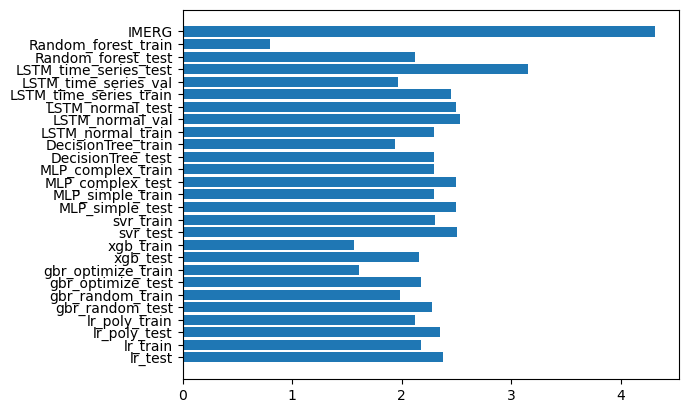

In [68]:
# RMSE scores

names = list(all_RMSE_scores.keys())
values = list(all_RMSE_scores.values())

fig, axs = plt.subplots()

axs.barh(names, values)

plt.show()

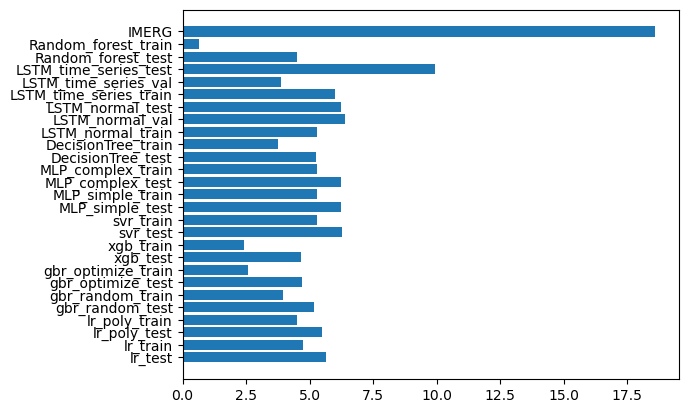

In [69]:
# MSE scores

names = list(all_MSE_scores.keys())
values = list(all_MSE_scores.values())

fig, axs = plt.subplots()

axs.barh(names, values)

plt.show()

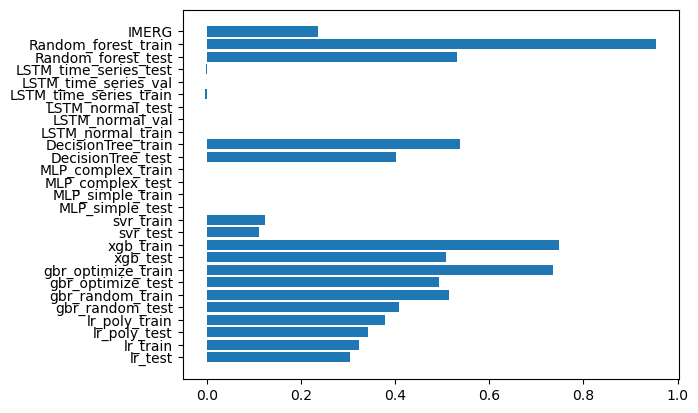

In [70]:
# Pearsonr scores
names = list(all_Pearsonr_scores.keys())
values = list(all_Pearsonr_scores.values())

fig, axs = plt.subplots()

axs.barh(names, values)

plt.show()

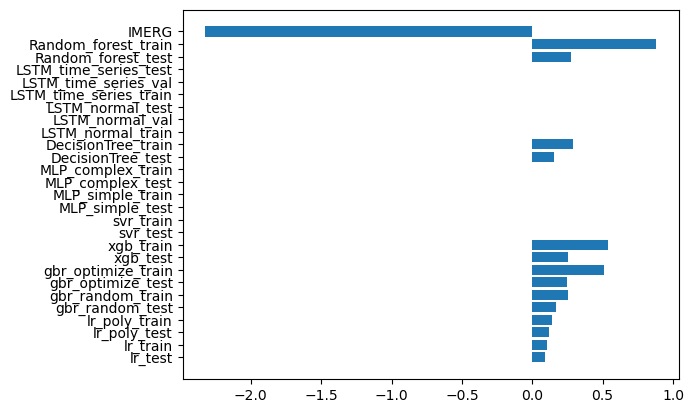

In [71]:
# R2 scores
names = list(all_R2_scores.keys())
values = list(all_R2_scores.values())

fig, axs = plt.subplots()

axs.barh(names, values)

plt.show()

In [72]:
# Print all
print(all_RMSE_scores)
print(all_MSE_scores)
print(all_Pearsonr_scores)
print(all_R2_scores)

{'lr_test': 2.3793378656467747, 'lr_train': 2.1726566992606924, 'lr_poly_test': 2.346019508512126, 'lr_poly_train': 2.1252526236123175, 'gbr_random_test': 2.278383065922343, 'gbr_random_train': 1.9848936859546928, 'gbr_optimize_test': 2.1717536153671304, 'gbr_optimize_train': 1.6064425486728664, 'xgb_test': 2.1548163840603545, 'xgb_train': 1.5604588573803828, 'svr_test': 2.5021382655743745, 'svr_train': 2.3013073398123516, 'MLP_simple_test': 2.496746977398353, 'MLP_simple_train': 2.2962788331066117, 'MLP_complex_test': 2.4967462404166896, 'MLP_complex_train': 2.296279959245936, 'DecisionTree_test': 2.294460670796737, 'DecisionTree_train': 1.9349831062722629, 'LSTM_normal_train': 2.2962966012446824, 'LSTM_normal_val': 2.5309642486448585, 'LSTM_normal_test': 2.4968508918238395, 'LSTM_time_series_train': 2.4477367009686, 'LSTM_time_series_val': 1.9666803897792287, 'LSTM_time_series_test': 3.1542856627517617, 'Random_forest_test': 2.122246599332213, 'Random_forest_train': 0.797508107615143